In [1]:
import uproot3 as up 
import numpy as np
from skimage import transform
from pylab import figure, cm
from matplotlib.colors import LogNorm

In [2]:
ttbar_events = up.open("/data/rohin/ttbar_Akt10.root")['ntuple']
ztt_events   = up.open("/data/rohin/ztt_Akt10.root")['ntuple']

ttbar_events.keys()

[b'AntiKt10LCTopoLeadJets_partonTruthLabel',
 b'AntiKt10LCTopoLeadJets_pt',
 b'AntiKt10LCTopoLeadJets_nConstitutents',
 b'AntiKt10LCTopoLeadJets_eta',
 b'AntiKt10LCTopoLeadJets_phi',
 b'AntiKt10LCTopoLeadJets_clus_calE',
 b'AntiKt10LCTopoLeadJets_clus_calEta',
 b'AntiKt10LCTopoLeadJets_clus_calPhi',
 b'AntiKt10LCTopoSubLeadJets_partonTruthLabel',
 b'AntiKt10LCTopoSubLeadJets_pt',
 b'AntiKt10LCTopoSubLeadJets_nConstitutents',
 b'AntiKt10LCTopoSubLeadJets_eta',
 b'AntiKt10LCTopoSubLeadJets_phi',
 b'AntiKt10LCTopoSubLeadJets_clus_calE',
 b'AntiKt10LCTopoSubLeadJets_clus_calEta',
 b'AntiKt10LCTopoSubLeadJets_clus_calPhi']

In [3]:
df_tt   = ttbar_events.pandas.df(flatten=False)
df_ztt  = ztt_events.pandas.df(flatten=False)

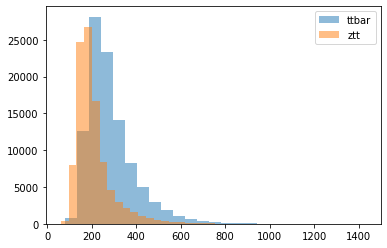

In [4]:
import matplotlib.pyplot as plt
plt.hist(df_tt['AntiKt10LCTopoLeadJets_pt']/1e3,bins=25,alpha=0.5,label='ttbar')
plt.hist(df_ztt['AntiKt10LCTopoLeadJets_pt']/1e3,bins=25,alpha=0.5,label='ztt')
plt.legend()
plt.savefig("pt.png")

In [5]:
df_ttSel = df_tt[df_tt['AntiKt10LCTopoLeadJets_pt']/1e3 > 100]
df_zttSel= df_ztt[df_ztt['AntiKt10LCTopoLeadJets_pt']/1e3 > 100]

(array([8.5370e+03, 2.3952e+04, 2.5659e+04, 1.6676e+04, 8.6500e+03,
        4.7060e+03, 3.1080e+03, 2.2220e+03, 1.6230e+03, 1.1820e+03,
        8.7700e+02, 5.8500e+02, 4.5000e+02, 3.1700e+02, 2.3700e+02,
        1.7100e+02, 1.1400e+02, 7.8000e+01, 6.2000e+01, 4.0000e+01,
        1.8000e+01, 1.6000e+01, 8.0000e+00, 3.0000e+00, 6.0000e+00]),
 array([100.00695, 133.21011, 166.41328, 199.61644, 232.81961, 266.02277,
        299.22592, 332.4291 , 365.63226, 398.83542, 432.0386 , 465.24176,
        498.44492, 531.6481 , 564.85126, 598.05444, 631.25757, 664.46075,
        697.6639 , 730.86707, 764.07025, 797.2734 , 830.47656, 863.67975,
        896.8829 , 930.08606], dtype=float32),
 <BarContainer object of 25 artists>)

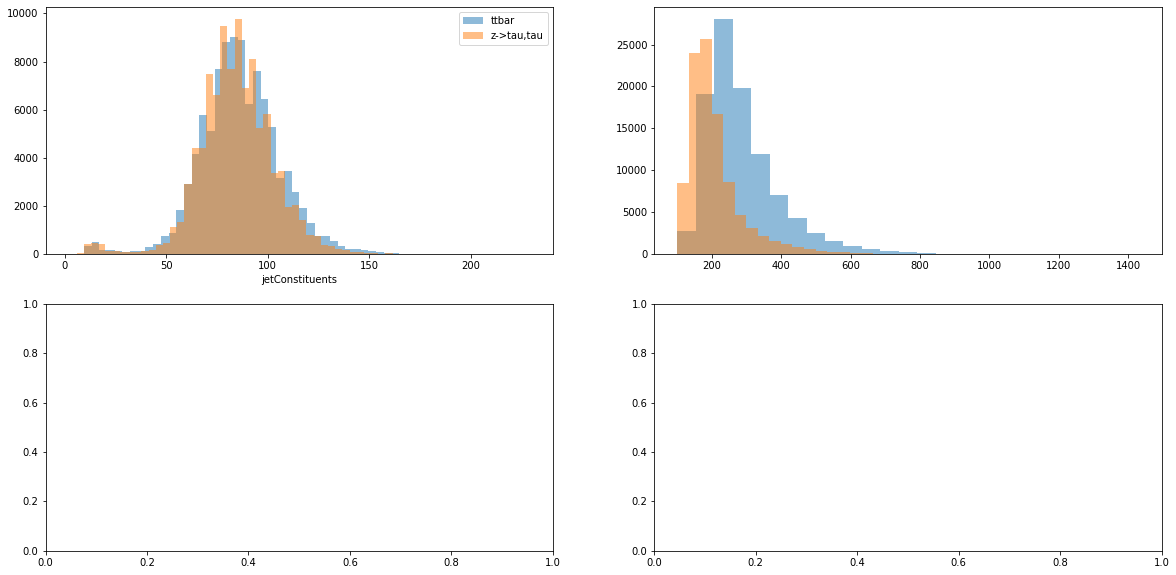

In [6]:
fig, axes = plt.subplots(2,2,figsize=(20,10))


axes[0][0].hist(df_ttSel['AntiKt10LCTopoLeadJets_nConstitutents'],bins=60,alpha=0.5,label='ttbar')
axes[0][0].hist(df_ztt['AntiKt10LCTopoLeadJets_nConstitutents'],bins=60,alpha=0.5,label='z->tau,tau')
axes[0][0].set(xlabel='jetConstituents')
axes[0][0].legend()



axes[0][1].hist(df_ttSel['AntiKt10LCTopoLeadJets_pt']/1e3,bins=25,alpha=0.5,label='ttbar')
axes[0][1].hist(df_zttSel['AntiKt10LCTopoLeadJets_pt']/1e3,bins=25,alpha=0.5,label='z->tau,tau')



#df_ttSel['AntiKt10LCTopoSubLeadJets_nConstitutents'].describe()

In [7]:
#plt.hist(df_ttSel["AntiKt10LCTopoLeadJets_clus_calEta"])

In [8]:
def saveimage(df,imName):
    #translate
    leading_jet_images
    x = pixel_edges()
    df_ttSel[['modEta','modPhi']] = translate(df_ttSel,['AntiKt10LCTopoLeadJets_clus_calEta',
                                                  'AntiKt10LCTopoLeadJets_clus_calPhi']).tolist()
    df_zttSel[['modEta','modPhi']] = translate(df_zttSel,['AntiKt10LCTopoLeadJets_clus_calEta',
                                                  'AntiKt10LCTopoLeadJets_clus_calPhi']).tolist()

def translate(df,cols):
    '''Convert selected df with selected columns into 
    numpy arrays'''
    arrays = np.array([df[x] for x in cols])
    '''Create a return vector of exactly the same shape
    as the input'''
    ret      = np.zeros((arrays.shape),dtype=object)

    
    '''Loop over the column names and subtract from every entry, the leading entry'''
    for i,aCol in enumerate(cols):
        col0 = arrays[i,:,:,][:,0]
        ret[i,:] = (arrays[i,] - col0[:,np.newaxis])

    return ret


def pixel_edges(jet_size=1.0, pixel_size=(0.1, 0.1), border_size=0.5):
    """Return pixel edges required to contain all clusters.
    border_size is interpreted as a fraction of the jet_size
    """
    im_edge = (1. + border_size) * jet_size
    return (np.arange(-im_edge, im_edge+pixel_size[0], pixel_size[0]),
            np.arange(-im_edge, im_edge+pixel_size[1], pixel_size[1]))

def pixelize(jet_csts, edges, cutoff=0.1):
    """Return eta-phi histogram of transverse energy deposits.
    Optionally set all instensities below cutoff to zero.
    """
    image, _, _ = np.histogram2d(
        jet_csts['modEta'], jet_csts['modPhi'],
        bins=(edges[0], edges[1]),
        weights=jet_csts['AntiKt10LCTopoSubLeadJets_clus_calE'] * (jet_csts['AntiKt10LCTopoSubLeadJets_clus_calE'] > cutoff))
    return image

def pixelize2(data, edges, cutoff=0.1):
    """Return eta-phi histogram of transverse energy deposits.
    Optionally set all instensities below cutoff to zero.
    """
    image, _, _ = np.histogram2d(
        data[0],data[1],
        bins=(edges[0], edges[1]),
        weights=data[2] * (data[2] > cutoff))
    return image

def getJetImages(df):
    eta = translate(df,['AntiKt10LCTopoLeadJets_clus_calEta','AntiKt10LCTopoLeadJets_clus_calPhi'])[0]
    phi = translate(df,['AntiKt10LCTopoLeadJets_clus_calEta','AntiKt10LCTopoLeadJets_clus_calPhi'])[1]
    eng = df.AntiKt10LCTopoLeadJets_clus_calE.values
    
    edges = pixel_edges()
    li_images = []
    for i in range(eta.shape[0]):
        li_images.append(pixelize2([eta[i],phi[i],eng[i]],edges))
    return li_images

def normalize(histo, multi=255):
    """
    Normalize picture in [0,multi] range, with integer steps. E.g. multi=255 for 256 steps.
    """
    return (histo/np.max(histo)*multi).astype(int)

In [9]:
x = pixel_edges()
df_ttSel[['modEta','modPhi']] = translate(df_ttSel,['AntiKt10LCTopoLeadJets_clus_calEta',
                                                  'AntiKt10LCTopoLeadJets_clus_calPhi']).tolist()

df_zttSel[['modEta','modPhi']] = translate(df_zttSel,['AntiKt10LCTopoLeadJets_clus_calEta',
                                                  'AntiKt10LCTopoLeadJets_clus_calPhi']).tolist()



/home/rnarayan/.conda/envs/hls4ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rnarayan/.conda/envs/hls4ml/lib/python3.7/site-packages/pandas/core/indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)
/home/rnarayan/.conda/envs/hls4ml/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value i

In [10]:
li_ttImgs  = getJetImages(df_ttSel)
li_zttImgs = getJetImages(df_zttSel)
np.savez_compressed('tt_leading_jet.npz', li_ttImgs)
np.savez_compressed('ztt_leading_jet.npz',li_zttImgs)

In [11]:
img1 = np.average(li_ttImgs,axis=0)
img2 = np.average(li_zttImgs,axis=0)

In [12]:
img1 = normalize(img1)
img2 = normalize(img2)

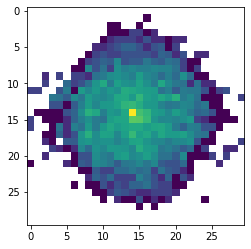

In [13]:
cmap = plt.get_cmap('gray')
import matplotlib
plt.imshow(img1,norm=matplotlib.colors.LogNorm())#,cmap=cmap)

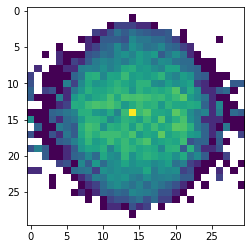

In [14]:
plt.imshow(img2,norm=matplotlib.colors.LogNorm())#,cmap=cmap)

In [16]:
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
x_data = np.concatenate((np.array(li_ttImgs), np.array(li_zttImgs)))
x_data = x_data.reshape(x_data.shape + (1,)).astype('float32')
x_data /= 255.
y_data = np.array([0]*len(li_ttImgs)+[1]*len(li_zttImgs))
y_data = keras.utils.to_categorical(y_data, 2)

print(len(li_ttImgs))
print(len(li_zttImgs))
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.33, random_state=42)

import h5py
h5 = h5py.File('jetImages.h5','w')
h5.create_dataset("x_train",data=x_train)
h5.create_dataset("x_test",data=x_test)
h5.create_dataset("y_train",data=y_train)
h5.create_dataset("y_test",data=y_test)
h5.close()

99856
99297


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), input_shape=(30, 30,1), activation='relu'))
model_cnn.add(Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Flatten())
model_cnn.add(Dense(300, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(2, activation='softmax'))

# Compile model

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cnn = model_cnn.fit(x_train, y_train, validation_split=0.2, epochs=40, batch_size=100, shuffle=True, verbose=1)

In [ ]:
#x_train
predictions_cnn = model_cnn.predict(x_test)
model_cnn.save('cnn.h5')

In [ ]:
#fig, axes = plt.subplots(1,2,figsize=(10,4))
from sklearn.metrics import roc_curve
fpr_cnn, tpr_cnn, thresholds = roc_curve(y_test.ravel(), predictions_cnn.ravel())

from sklearn.metrics import auc
auc = auc(fpr_cnn, tpr_cnn)

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cnn, tpr_cnn, label='Convolutional NN (area = {:.3f})'.format(auc))
plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right');
plt.savefig('ROC_curve.png')

In [ ]:
np.seterr(divide='ignore', invalid='ignore') # disable warning for 1/0 divisions
plt.plot(thresholds, 1/thresholds, 'k--')
plt.plot(tpr_cnn, 1/fpr_cnn, label='Convolutional NN low pT ')
plt.gca().set(ylabel='1/$\epsilon_B$ - 1/False positive rate', xlabel='$\epsilon_S$ - True positive rate', 
              title='', xlim=(-0.01,1.01), ylim=(1,5*10**3), yscale='log')
plt.grid(True, which="both")
plt.legend();

# Hyper parameter optimization using kerasTune


In [ ]:
import kerastuner as kt
from kerastuner.tuners import Hyperband

from qkeras import QActivation
from qkeras import QDense, QConv2D
from qkeras import quantized_bits
from qkeras import QBatchNormalization
from tensorflow_model_optimization.sparsity.keras import prune_low_magnitude

def buildmodel(hp):
    model_cnn = Sequential()
    model_cnn.add(Conv2D(32, (3, 3), input_shape=(30, 30,1), activation='relu'))
    model_cnn.add(Conv2D(32, (3, 3), activation='relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    model_cnn.add(Dropout(0.25))
    
    model_cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model_cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    model_cnn.add(Dropout(0.25))
    
    model_cnn.add(Flatten())
    model_cnn.add(Dense(300, activation='relu'))
    model_cnn.add(Dropout(0.5))
    model_cnn.add(Dense(2, activation='softmax'))

def qkeras_cnn(name_, Inputs,nclasses,filters,kernel,strides,
               pooling, dropout, activation, pruning_params = {},qb=quantized_bits(6,0,alpha=1)):
    length = len(filters)
    if any(len(lst) != length for lst in [filters, kernel, strides,pooling,dropout]):
        sys.exit("One value for stride and kernel must be added for each filter! Exiting") 
    x = x_in = Inputs
    x = BatchNormalization()(x)
    x = ZeroPadding2D( padding=(1, 1), data_format="channels_last") (x)
    for i,(f,k,s,p,d) in enumerate(zip(filters,kernel,strides,pooling,dropout)):
        print (("Adding layer with {} filters, kernel_size=({},{}), strides=({},{})").format(f,k,k,s,s))
        x = QConv2D(int(f), kernel_size=(int(k), int(k)), strides=(int(s),int(s)),
                kernel_quantizer=qb, bias_quantizer=qb,
                kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001), use_bias=False, name='conv_%i'%i)(x) 
        if float(p) != 0:
            x = MaxPooling2D(pool_size = (int(p),int(p)) )(x)
        x = BatchNormalization()(x)
        x = Activation(activation,name='conv_act_%i'%i)(x)
    x = Flatten()(x)
    x = QDense(128,kernel_quantizer=qb, bias_quantizer=qb,kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001),name='dense_1', use_bias=False)(x)
    x = Dropout(0.25) (x)
    x = BatchNormalization()(x)
    x = Activation(activation,name='dense_act')(x)
    x_out = Dense(nclasses, activation='softmax',name='output')(x)
    model = Model(inputs=[x_in], outputs=[x_out], name=name_)
    return model


In [ ]:
model_q = qkeras_cnn("qmodel",)